In [1]:
import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

##### Importing the data

In [2]:
x=pd.read_csv('wdbc_dataset.csv',delimiter=',',
            names=["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave,points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"])

##### Data processing

In [3]:
x['diagnosis']=x['diagnosis'].map({'M':1,'B':0})

#drop id column
x=x.drop(columns=['id'])

#diagnosis values is assigned to x
y=x['diagnosis'].values
x = x.drop(['diagnosis'], axis = 1) 

##### Min-Max normalisation on the processed data

In [4]:
def normaliseData(data):
    max_minus_min = (np.max(data) - np.min(data))
    data_minus_min = data - np.min(data)
    return (data_minus_min)/(max_minus_min).values

x = normaliseData(x)

##### Splitting data into three parts training, testing and validation

In [28]:
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.2, random_state = 54)


x_test, x_valid, y_test, y_valid = train_test_split( 
    x_test, y_test, test_size = 0.5, random_state = 54)

##### Transpose matrix of the input feature

In [29]:
print(x_train.shape) # 455 X 31
x_train = x_train.T # 31 X 455 
y_train = np.asarray(y_train).T # 455, 1


print(x_valid.shape) # 57 X 31
x_valid = x_valid.T  # 31 X 57
y_valid = y_valid.T # 57 X 1

print(x_test.shape) # 57 X 31
x_test = x_test.T  # 31 X 57
y_test = y_test.T # 57 X 1


(455, 30)
(57, 30)
(57, 30)


###### Sigmoid function

In [23]:
def sigmoid(z): 
    a = 1/(1 + np.exp(-z)) 
    return a 

###### Prediction algorithm

In [24]:
def predict(w, b, x_test): 
    z = sigmoid(np.dot(w.T, x_test)+b) 
    Y_prediction = np.zeros((1, x_test.shape[1])) 
     
    for i in range(z.shape[1]): 

        if z[0, i]<= 0.5: 
            Y_prediction[0, i] = 0
        else: 
            Y_prediction[0, i] = 1
  
    return Y_prediction

##### Precision recall and fmeasure calculation

In [25]:
def preciscion_recall_fmeasure(Yactual, Ypredicted):
        #print(Yactual.argmax(axis=1))
        #print(Ypredicted.argmax(axis=1))
        conf_matrix = confusion_matrix(Yactual.argmax(axis=1), Ypredicted.argmax(axis=1))
        precision = conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[1][0])
        recall = conf_matrix[0][0]/(conf_matrix[0][0] + conf_matrix[0][1])
        fmeasure = (2*recall*precision)/(recall+precision)
        return precision, recall, fmeasure

##### Logistic regression function

In [30]:
def logistic_regression(x_train, y_train, x_test, y_test,  
                        learning_rate,  epochs): 
  
    dimension = x_train.shape[0] 
    
    #initialisation of gradients
    w = np.random.randn(dimension, 1)*0.01 
    b = 0.0
    
    #hyperParameters = [] -> # for adding the hyper parameters and accuracy information to an excel sheet
    cost_list = [] 
    cost_valid_list = []
    index = [] 
    training_accuracy = []
    valid_accuracy = []
  
    for i in range(epochs): 
    
        z = np.dot(w.T, x_train) + b 
        a = sigmoid(z)
        
        cost = -np.sum(np.multiply(np.log(a), y_train) + np.multiply((1 - y_train), np.log(1 - a)))/x_train.shape[1]
        
        #backward propogation starts here
        
        dz = (a - y_train)
        dw = (np.dot(x_train, (dz.T))) / x_train.shape[1]  
        db =  np.mean(dz)
        
        training_accuracy.append(100 - np.mean(np.abs(predict(w, b, x_train) - y_train)))
        
        z1 = np.dot(w.T, x_valid) + b 
        a1 = sigmoid(z1)
        cost_valid = -np.sum(np.multiply(np.log(a1), y_valid) + np.multiply((1 - y_valid), np.log(1 - a1))) / x_valid.shape[1] 
  
        valid_accuracy.append(100 - np.mean(np.abs(predict(w, b, x_valid) - y_valid)))
    
        cost_list.append(cost)
        cost_valid_list.append(cost_valid)
        
        # updating the weight and bias after the iteration 
        w = w - learning_rate * dw 
        b = b - learning_rate * db 
  
    parameters = {"weight": w, "bias": b} 
    plt.plot(cost_list)
    plt.plot(cost_valid_list)
    plt.gca().legend(('Training Cost','Validation Cost'))
    plt.xticks(index, rotation =20) 
    plt.title("Cost vs Epochs")
    plt.xlabel("Epochs") 
    plt.ylabel("Cost") 
    plt.show() 
    
    
    plt.plot(training_accuracy)
    plt.plot(valid_accuracy)
    plt.gca().legend(('Training Accuracy','Validation Accuracy'))
    plt.xticks(index, rotation =20) 
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs") 
    plt.ylabel("Accuracy") 
    plt.show() 
    
    #update function ends here
    
    y_prediction_valid = predict(w, b, x_valid) 
    y_prediction_train = predict(w, b, x_train) 
    y_prediction_test = predict(w, b, x_test) 
    
    # train / test Errors
    train_accuracy = (100 - np.mean(np.abs(y_prediction_train - y_train)) * 100)
    validation_accuracy = (100 - np.mean(np.abs(y_prediction_valid - y_valid)) * 100)
    test_accuracy = (100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)
    print("train accuracy: {} %".format(train_accuracy)) 
    print("validation accuracy: {} %".format(validation_accuracy))
    print("test accuracy: {} %".format(test_accuracy) )
    num_classes = 2

    #precision and recall calculation for training dataset
    prediction_matrix_train = np.asmatrix(y_prediction_train.astype(int))
    res_prediction_train = np.zeros((prediction_matrix_train.size, num_classes), dtype=int)
    res_prediction_train[np.arange(prediction_matrix_train.size), prediction_matrix_train] = 1
    
    print('\n')
    actual_train_result = np.zeros((y_train.size, num_classes), dtype=int)
    actual_train_result[np.arange(y_train.size), y_train] = 1

    training_precision, training_recall, training_fmeasure = preciscion_recall_fmeasure(actual_train_result, res_prediction_train)
    
    print("Precision for Training dataset: {} %".format(training_precision*100))
    print("Recall for training dataset: {} %".format(training_recall*100))
    print("fmeasure for training dataset: {} %".format(training_fmeasure*100))
    
    
    #precision and recall calculation for validation dataset
    prediction_matrix_valid = np.asmatrix(y_prediction_valid.astype(int))
    res_prediction_valid = np.zeros((prediction_matrix_valid.size, num_classes), dtype=int)
    res_prediction_valid[np.arange(prediction_matrix_valid.size), prediction_matrix_valid] = 1
    
    print('\n')
    actual_valid_result = np.zeros((y_valid.size, num_classes), dtype=int)
    actual_valid_result[np.arange(y_valid.size), y_valid] = 1

    validation_precision, validation_recall, validation_fmeasure = preciscion_recall_fmeasure(actual_valid_result, res_prediction_valid)
    
    print("Precision for Validation dataset: {} %".format(validation_precision*100))
    print("Recall for Validation dataset: {} %".format(validation_recall*100))
    print("fmeasure for Validation dataset: {} %".format(validation_fmeasure*100))
    
    
    #precision and recall calculation for testing dataset
    actual_test_result = np.zeros((y_test.size, num_classes), dtype=int)
    actual_test_result[np.arange(y_test.size), y_test] = 1
    
    prediction_matrix_test = np.asmatrix(y_prediction_test.astype(int))
    res_prediction_test = np.zeros((prediction_matrix_test.size, num_classes), dtype=int)
    res_prediction_test[np.arange(prediction_matrix_test.size), prediction_matrix_test] = 1
    
    test_precision, test_recall, test_fmeasure = preciscion_recall_fmeasure(actual_test_result, res_prediction_test)
    
    print('\n')
    print("Precision for Testing dataset: {} %".format(test_precision*100))
    print("Recall for Testing dataset: {} %".format(test_recall*100))
    print("fmeasure for Testing dataset: {} %".format(test_fmeasure*100))
    

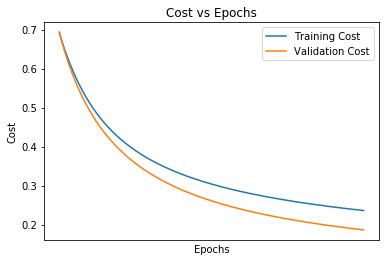

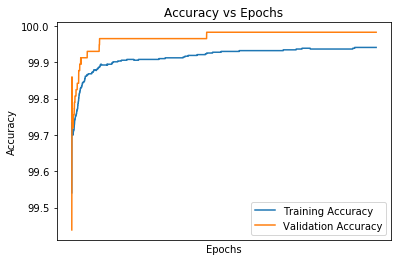

train accuracy: 94.06593406593407 %
validation accuracy: 98.24561403508773 %
test accuracy: 100.0 %


Precision for Training dataset: 92.61744966442953 %
Recall for training dataset: 98.22064056939502 %
fmeasure for training dataset: 95.33678756476684 %


Precision for Validation dataset: 100.0 %
Recall for Validation dataset: 97.2972972972973 %
fmeasure for Validation dataset: 98.63013698630138 %


Precision for Testing dataset: 100.0 %
Recall for Testing dataset: 100.0 %
fmeasure for Testing dataset: 100.0 %


In [31]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, epochs = 9800)